# User Knowledge Data Analysis Project Proposal

### Group Members:
- Lauren Kufske

- Lea Liang

- Tanvi Singh

- Xinyao Zhou

# —Introduction—

### About: 

This data set describes 5 variables that may be used as an indicator of a students' knowledge surrounding the primary subject of Electrical DC Machines. The data set includes variables listed in the table below such as; the amount of time a student spent studying the primary subject, time spent studying other subjects that relate to the primary subject (for example this could be math courses, physics courses etc.), as well as exam scores in those subjects. These are a few of the 5 variables that are included that may provide an indication of a student’s knowledge of the primary subject. Which variables are most suitable for this assessment will be determined in the data analysis to come.

### The question we will work towards answering using a data model:

How can we determine the knowledge level of a user based on the most appropriate two variables from the dataset?


### Identifying and Describing our chosen data set:

- The data set that this project will be centered around is the User Knowledge Modeling Data Set sourced from UCI Machine Learning Repository. This dataset is multivariate and has been divided into a training set and test set. There are 5 columns: 

  - STG (The degree of study time for goal object materials)

  - SCG (The degree of repetition number of user for goal object materials)

  - STR (The degree of study time of user for related objects with goal object)

  - LPR (The exam performance of user for related objects with goal object)

  - PEG (The exam performance of user for goal objects)

  - UNS (The knowledge level of user)

- The first four columns have been standardized to decimal values and the class distributions for the user intelligence column (UNS) include:

  - very_low,

  - low,

  - middle,

  - high.

# —Preliminary and Exploratory Data Analysis—

For our exploratory data analysis, we first need to load the necessary packages.

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readxl)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Our chosen data set is an excel spreadsheet, so the read_excel function is required to read the data into R.

In [2]:
userknowledge <- read_excel("userknowledge.xlsx")
head(userknowledge)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


We first created a scatterplot finding the correlation between two random variables, coloring in the "knowledge level" variable, to see if there was any kind of relationship between the two. 

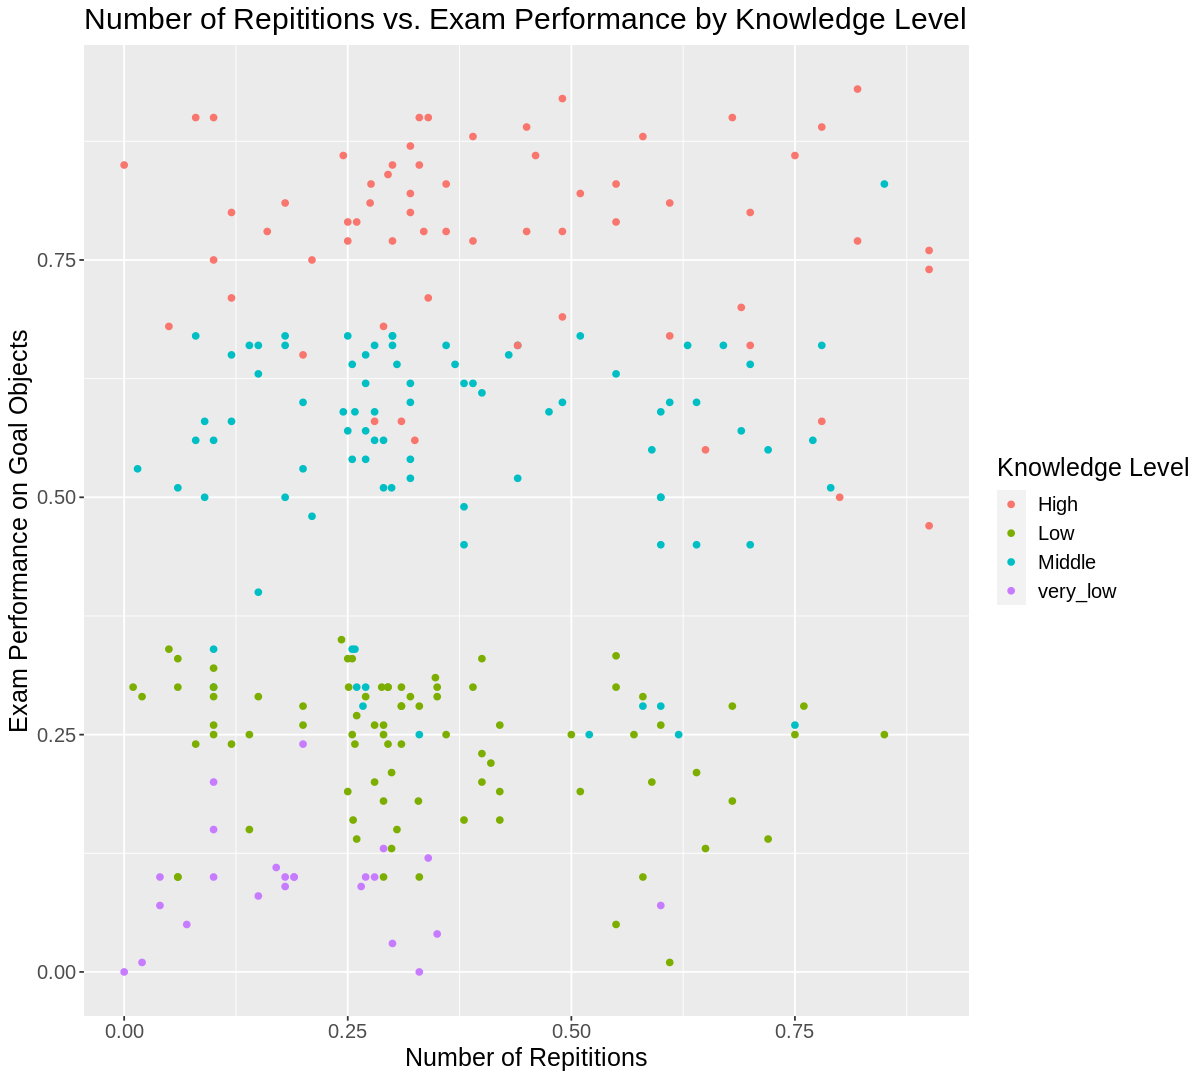

In [7]:
options(repr.plot.width = 10, repr.plot.height = 9) 

userknowledge_plot <- ggplot(userknowledge, aes(x = SCG, y = PEG, color = UNS)) +
geom_point() +
labs(x = "Number of Repititions", y = "Exam Performance on Goal Objects", color = "Knowledge Level") +
ggtitle("Number of Repititions vs. Exam Performance by Knowledge Level")+
theme(text = element_text(size = 15))

userknowledge_plot

We then proceeded to create a summary of our table of values, grouping by the "knowledge level" variable. We found the mean values for all of the quantitative variables. 

In [11]:
mean_know_level <- group_by(userknowledge, UNS) %>%
summarize(avg_STG = mean(STG),
         avg_SCG = mean(SCG),
         avg_STR = mean(STR),
         avg_LPR = mean(LPR),
         avg_PEG = mean(PEG))

mean_know_level

UNS,avg_STG,avg_SCG,avg_STR,avg_LPR,avg_PEG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4216508,0.4231905,0.5016667,0.5012698,0.77253968
Low,0.3211446,0.3370000,0.4307229,0.4973494,0.23762651
Middle,0.3999773,0.3679205,0.5068182,0.3428409,0.54238636
very_low,0.3057917,0.1981250,0.3662500,0.3587500,0.09083333


We then created a bar plot based on these mean values, using the same random variables used in the first scatterplot.

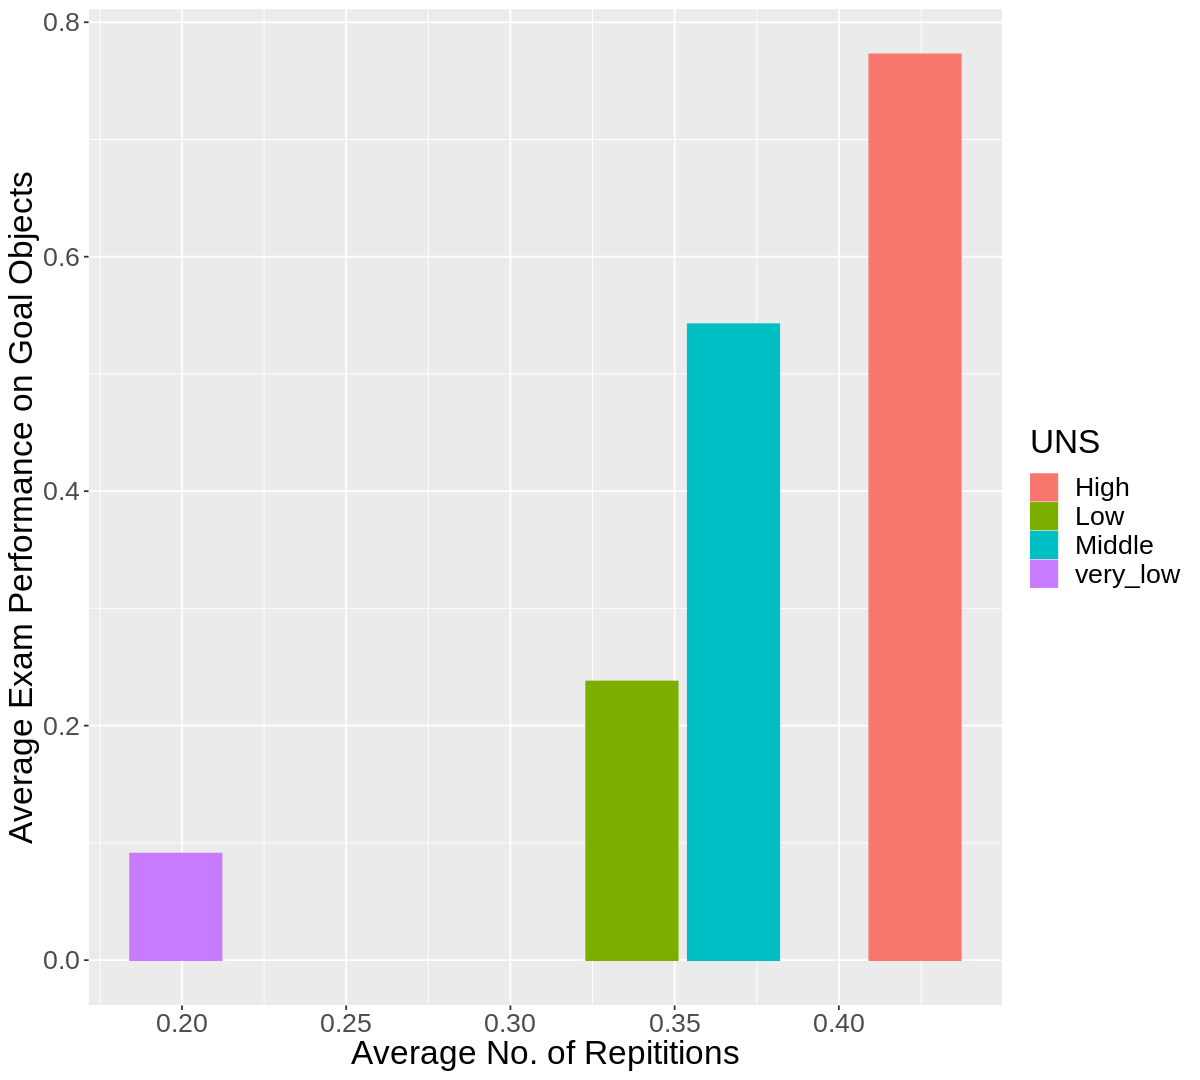

In [14]:
mean_know_level_plot <- ggplot(mean_know_level, aes(x = avg_SCG, y = avg_PEG, color = UNS, fill = UNS)) +
geom_bar(stat = "identity") +
labs(x = "Average No. of Repititions", y = "Average Exam Performance on Goal Objects")+
theme(text = element_text(size = 20))
mean_know_level_plot

# —Methods—

### How will we conduct our data analysis?

Based on the training set and test set that were already separated for our use, we will do the following steps for data analysis to determine which variables to be used as predictors and finally make a prediction:

- Make different combinations of 2 variables. 

- Create a scatter plot using the training set for each pair of variables. Put the variables on the axes and the classification of knowledge level on the goal object as color labels. Identify which pair of variables together affect the classification of knowledge level on the goal object the most (i.e. has the most obvious pattern)

- Build a K-nearest neighbors classifier with the training set, the 2 variables that we identified in step 2 as predictors and the knowledge level of goal object as the target variable.

- Predict and classify the knowledge level of the user on the goal object for each observation in the test set.

E.g. If we found out that STR (The degree of study time of user for related objects with goal object) and LPR (The exam performance of user for related objects with goal object) are the major factors that determine the knowledge level on the goal object in step 2, we will serve these as predictors to predict a user’s knowledge level of the goal object. So the significance of our research will be to determine a user’s knowledge level of the goal object from their academic performance.


### How will we visualize our results?

We will use scatter plots to visualize our data analysis and results. The two predictors (or each pair of 2 variables in step 2) will be on the x and y axes and our target variable of classification will be the color label, so as to observe and explore how the two chosen variables together affect the classification of knowledge level of the goal object.


# —Expected outcomes and significance—

### What do you expect to find?

We expect to find a correlation between the STG variable and UNS knowledge level score. As well as another positive relationship between the PEG variable and the UNS knowledge score.


### What impact could such findings have?

Depending on which variables are determined by our data analysis to have the strongest relationship with the UNS knowledge score, students will be able to plan their time accordingly into a studying format that allows them to obtain the best knowledge of their goal topic as possible.


### What future questions could this lead to?

This analysis could lead to further research surrounding concepts such as; what related subjects are realistically required for successful study in a certain goal subject? This could allow for educators to rethink their methods and ultimately create an improved education system for all.
